In [1]:
from google.colab import drive
# Step 1: Mount Google Drive
drive.mount('/content/drive')
image_folder ='/content/drive/MyDrive/Images'

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from PIL import Image
import os

# Load the dataset
df = pd.read_csv('Final Fashion Dataset.csv')

# Define the category and attribute columns
category_col = 'masterCategory'
attributes = ['gender', 'baseColour', 'subCategory', 'articleType']

# Initialize and fit the OneHotEncoder
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[attributes]).toarray()

# Get the feature names for better readability
encoded_feature_names = encoder.get_feature_names_out(attributes)

# Convert the encoded features into a DataFrame for easy viewing
encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# Display the first few rows of the encoded features
print(encoded_df.head())

# Group data by masterCategory to recommend across different categories
category_groups = df.groupby(category_col).groups

   gender_Boys  gender_Girls  gender_Men  gender_Unisex  gender_Women  \
0          0.0           0.0         0.0            0.0           1.0   
1          0.0           0.0         1.0            0.0           0.0   
2          0.0           0.0         0.0            0.0           1.0   
3          0.0           0.0         1.0            0.0           0.0   
4          0.0           0.0         0.0            1.0           0.0   

   baseColour_Beige  baseColour_Black  baseColour_Blue  baseColour_Bronze  \
0               0.0               1.0              0.0                0.0   
1               0.0               0.0              0.0                0.0   
2               0.0               1.0              0.0                0.0   
3               0.0               0.0              1.0                0.0   
4               0.0               1.0              0.0                0.0   

   baseColour_Brown  ...  articleType_Tracksuits  \
0               0.0  ...                     0

In [4]:
def get_complementary_recommendations(item_id, feature_matrix, df, category_col, top_n=5):
    item_index = df.index[df['id'] == item_id][0]  # Find the index of the item by ID
    input_category = df.iloc[item_index][category_col]
    similarity_scores = cosine_similarity(feature_matrix[item_index].reshape(1, -1), feature_matrix).flatten()
    recommended_indices = []

    for category, indices in category_groups.items():
        if category != input_category:
            category_similarities = [(idx, similarity_scores[idx]) for idx in indices]
            sorted_category_similarities = sorted(category_similarities, key=lambda x: x[1], reverse=True)
            recommended_indices.extend(sorted_category_similarities[:1])

    recommended_indices = sorted(recommended_indices, key=lambda x: x[1], reverse=True)[:top_n]
    return recommended_indices

Input Item details:
 gender                 Women
baseColour             Black
masterCategory       Apparel
subCategory       Bottomwear
articleType           Skirts
Name: 0, dtype: object 



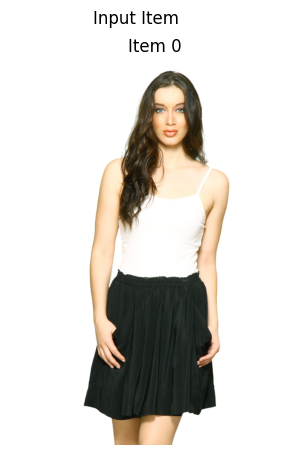


Details of Complementary Recommended Items 1 (Cosine Similarity: 0.5000):
gender                  Women
baseColour              Black
masterCategory    Accessories
subCategory              Bags
articleType          Handbags
Name: 2, dtype: object

Details of Complementary Recommended Items 2 (Cosine Similarity: 0.5000):
gender               Women
baseColour           Black
masterCategory    Footwear
subCategory          Shoes
articleType          Flats
Name: 36, dtype: object


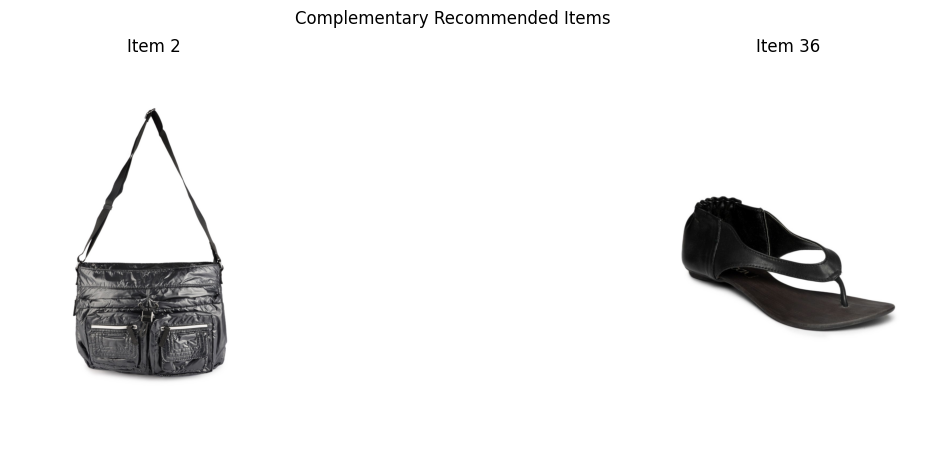

In [5]:
def display_images(indices_with_scores, title, df, image_dir='/content/drive/MyDrive/Images'):
    plt.figure(figsize=(15, 5))
    for i, (idx, score) in enumerate(indices_with_scores):
        item_details = df.iloc[idx][['gender', 'baseColour', 'masterCategory', 'subCategory', 'articleType']]

        # Print the details only once for the Input Item
        if title == "Input Item" and i == 0:
            print(f"{title} details:\n", item_details, "\n")
        else:
            print(f"\nDetails of {title} {i+1} (Cosine Similarity: {score:.4f}):")
            print(item_details)

        img_path = os.path.join(image_dir, f"{df.iloc[idx]['id']}.jpg")
        try:
            img = Image.open(img_path)
            plt.subplot(1, len(indices_with_scores), i + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f"Item {idx}")
        except FileNotFoundError:
            print(f"Image not found for item index {idx}")
    plt.suptitle(title)
    plt.show()

# Specify the item ID of the input item
item_id = 8493  # Replace with the actual ID
top_n = 5

# Get recommendations
recommended_items = get_complementary_recommendations(item_id, encoded_features, df, category_col, top_n=top_n)

# Display images
display_images([(df.index[df['id'] == item_id][0], 1.0)], title="Input Item", df=df)
display_images(recommended_items, title="Complementary Recommended Items", df=df)
